# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 26 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
FFT_imagen.ipynb	  root_build_google_yikes.tar
FFT.ipynb		  TrimmedTree.root
FLUTEMI.WAV		  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [5]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Oct 25 16:58 sample_data
drwx------  4 root root 4.0K Nov  7 17:17 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [7]:
import ROOT

Welcome to JupyROOT 6.14/04


### 4. Tree

In [0]:
from array import array

In [0]:
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )

In [0]:
dado1 = array( 'i', [ 0 ] )
dado2 = array( 'i', [ 0 ] )

# New branch
branch = array( 'f', [ 0. ] )

In [21]:
MyTree.Branch( 'dado 1', dado1, 'dado1/I' )
MyTree.Branch( 'dado 2', dado2, 'dado2/I' )

# Include new branch in tree
MyTree.Branch( 'branch', branch, 'branch/F' )

<ROOT.TBranch object ("branch") at 0x63f2f80>

In [0]:
from random import randint
import numpy.random as rnd

In [0]:
# Initialization
for i in range(1000):
  dado1[0] = randint(1,6)
  dado2[0] = randint(1,6)
  
  rnd.seed(dado2[0])

  branch[0] = rnd.random()
  MyTree.Fill()


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


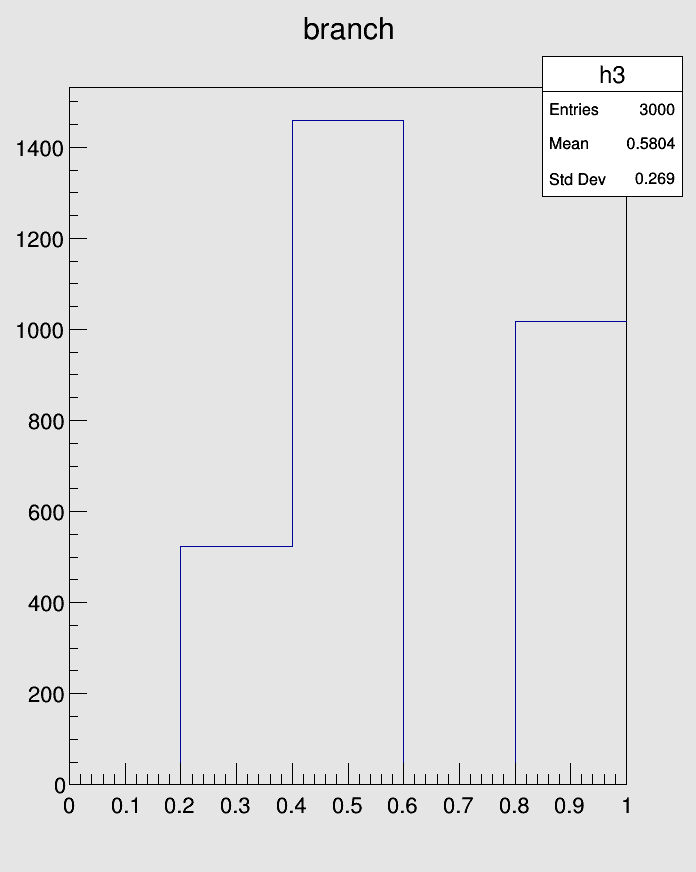

In [24]:
from ROOT import gROOT

c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
MyTree.Draw("branch>>h3(5,0,1)")
c1.Update()
gROOT.GetListOfCanvases().Draw()